# Drawing

## (1) 盒鬚圖
不同隱藏層神經元數量 (n=[1,20])下的 30 次建模結果盒鬚圖

In [1]:
from module.for_model.checkpoint import specific_loss
import matplotlib.pyplot as plt

In [2]:
name_experiment = "2024_0606_0319_part3"
n = 2

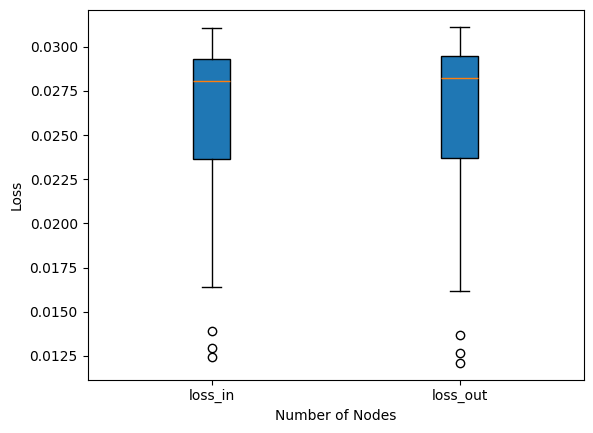

In [3]:
# 拿每個模型最好的 checkpoint 的 loss
# in-sample loss 跟 out-of-sample loss 可能拿不同的 checkpoint
loss_in, _ = specific_loss(name_experiment, n, type_loss=0)
loss_out, _ = specific_loss(name_experiment, n, type_loss=1)

ttl_loss = [loss_in, loss_out]
loss_name = ["loss_in", "loss_out"]
plt.boxplot(ttl_loss, patch_artist=True, tick_labels=loss_name)

# 添加标题和标签
# plt.title("Model with Different Hidden Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Loss")

# 显示图表
plt.show()

兩者分布幾乎相同

## (2) 真實 vs 預測
最佳隱藏層數量下，30 次建模結果最佳解的真實與預測解比較

In [4]:
import numpy as np
from module.for_model.checkpoint import get_best_model
from module.for_dataset.create_dataset import create_dataset
from module.for_dataset.normalization import normalization

### 調出 best model 的 best checkpoint 的參數

In [5]:
name_experiment = "2024_0606_0319_part3"
n = 2
nn_best, _ = get_best_model(name_experiment, n)

### 建立其他沒看過的資料

In [6]:
# 建立其他沒看過的資料
# (之前 random seed 設 0，這次要設不一樣)

random_seed = 1
num_analysis = 1000
num_data = int(num_analysis/0.8)

X, Y, _, _ = create_dataset(random_seed, num_data, "xor")

# reshape for the model output
Y = Y.reshape((-1,1))

# normalize
normalizer = normalization(X-5)
X_n = normalizer.normalize(X-5)
Y_n = normalizer.normalize(Y-5)


print(f"X = {X[0]}, Y = {Y[0]}")

X = [1.47137841 0.00422715], Y = [1]


### 比較不同輸入時，預測值、真實值的差異

In [7]:
# 稍微計算一下 loss
loss_average = nn_best.evaluate(X_n, Y_n)
loss_average

0.012755486161554551

In [8]:
# 比較輸入、預測值、標籤
diff = np.zeros(num_analysis, dtype=int)
for x, y, idx in zip(X, Y, range(num_analysis)):
    x_n = normalizer.normalize(x-0.5)
    pred = nn_best.forward([x_n])[0]
    y_pred = 0.5 + normalizer.unnormalize(pred)
    y_pred = y_pred.round()
    
    diff[idx] = y[0] - y_pred[0]
    print(f"x = {x},\ty_pred = {y_pred[0]},\ty = {y[0]}")

np.absolute(diff).mean()

x = [1.47137841 0.00422715],	y_pred = -5.0,	y = 1
x = [1.25691184 1.14351808],	y_pred = -5.0,	y = 0
x = [-0.39727088  1.22367555],	y_pred = -5.0,	y = 1
x = [-0.36961785 -0.25810749],	y_pred = -5.0,	y = 0
x = [-0.22226277  0.88947516],	y_pred = -5.0,	y = 1
x = [-0.35688343  0.11468221],	y_pred = -5.0,	y = 0
x = [-0.48082868  1.08572698],	y_pred = -5.0,	y = 1
x = [ 0.92651045 -0.36132896],	y_pred = -5.0,	y = 1
x = [1.32657962 1.232428  ],	y_pred = -5.0,	y = 0
x = [0.11347241 0.12622466],	y_pred = -5.0,	y = 0
x = [ 1.28344736 -0.20522466],	y_pred = -5.0,	y = 1
x = [ 0.9125349 -0.1267843],	y_pred = -5.0,	y = 1
x = [-0.01944935  0.88942032],	y_pred = -5.0,	y = 1
x = [0.90215024 0.85058533],	y_pred = -5.0,	y = 0
x = [0.19220276 1.41774032],	y_pred = -5.0,	y = 1
x = [-0.30368921  0.05249553],	y_pred = -5.0,	y = 0
x = [ 0.93191765 -0.18647453],	y_pred = -5.0,	y = 1
x = [ 0.13601685 -0.2944701 ],	y_pred = -5.0,	y = 0
x = [-0.29855726 -0.40898   ],	y_pred = -5.0,	y = 0
x = [-0.48644313 -0.024815

5.498

loss 還不錯

## (3) 學習曲線
最佳隱藏層數量下，30 次建模結果最佳解的學習曲線

In [9]:
import numpy as np
from module.for_model.checkpoint import get_best_model, load_checkpoint
import matplotlib.pyplot as plt

#### 調出 best model 的所有 checkpoint

In [10]:
name_experiment = "2024_0606_0319_part3"
n = 2
_, idx_best = get_best_model(name_experiment, n)
idx_best

5

In [11]:
path_folder = f"checkpoints\\{name_experiment}\\node_{n:02d}"
ttl_loss = load_checkpoint(path_folder, "loss")
ttl_loss = np.array(ttl_loss)
ttl_loss.shape

(30, 1001, 2)

#### 畫圖

In [12]:
x = range(ttl_loss.shape[1])
y_loss_in = ttl_loss[idx_best,:,0]      # in-sample loss        # 紅色
y_loss_out = ttl_loss[idx_best,:,1]     # out-of-sample loss    # 藍色

##### 觀察整體
看起來學習曲線下降得非常快，但仍在穩定下降中

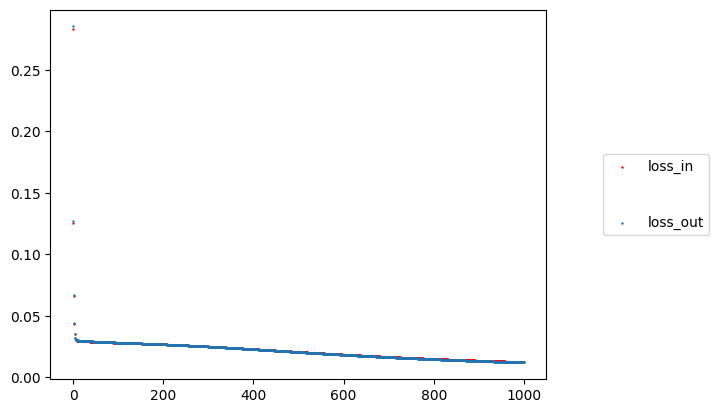

In [13]:
plt.scatter(x, y_loss_in, s=0.5, label="loss_in", color="r")
plt.scatter(x, y_loss_out, s=0.5, label="loss_out")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)

##### 觀察前期
一開始 loss_out 低於 loss_in 的狀況，很有趣。

(0.025, 0.3)

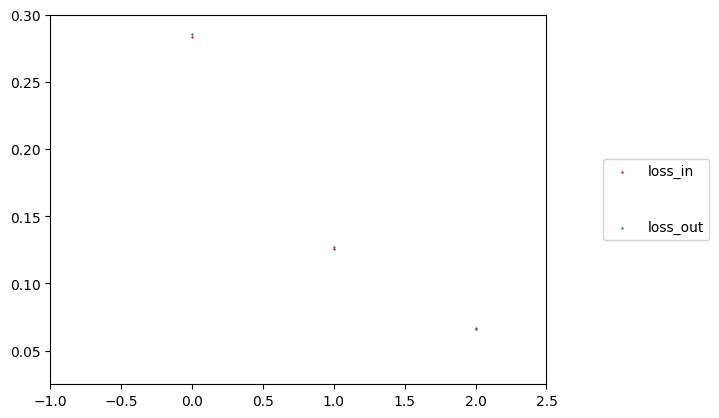

In [14]:
plt.scatter(x, y_loss_in, s=0.5, label="loss_in", color="r")
plt.scatter(x, y_loss_out, s=0.5, label="loss_out")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.xlim([-1,2.5])
plt.ylim([0.025,0.3])

##### 觀察轉折點
loss_out 下降速度趨緩，逐漸被 loss_in 超過

(0.03, 0.034)

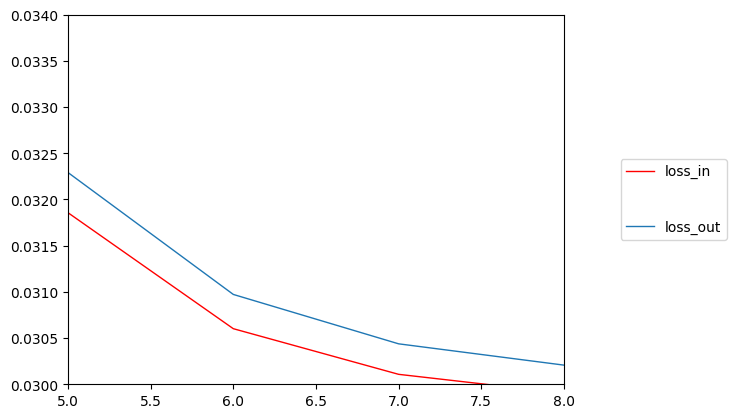

In [15]:
# plt.scatter(x, y_loss_in, s=0.5, label="loss_in", color="r")
# plt.scatter(x, y_loss_out, s=0.5, label="loss_out")

# plt.plot(x, y_loss_in, label="loss_in", color="r")
# plt.plot(x, y_loss_out, label="loss_out")
plt.plot(x, y_loss_in, linewidth=1, label="loss_in", color="r")
plt.plot(x, y_loss_out, linewidth=1, label="loss_out")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.xlim([5,8])
plt.ylim([0.03,0.034])

##### 觀察後期
loss_out 穩定低於 loss_in，很怪

(0.0122, 0.0155)

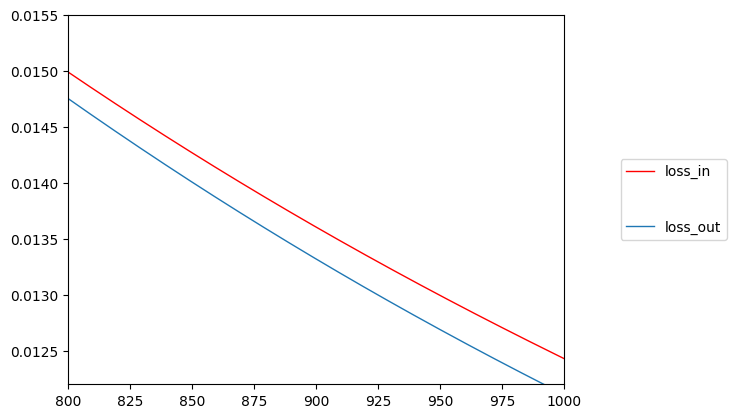

In [16]:
plt.plot(x, y_loss_in, linewidth=1, label="loss_in", color="r")
plt.plot(x, y_loss_out, linewidth=1, label="loss_out")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.xlim([800,1000])
plt.ylim([0.0122,0.0155])

## (4) Error Histogram
最佳隱藏層數量下，30 次建模結果最佳解的 Error Histogram。

In [17]:
import numpy as np
from module.for_model.checkpoint import get_best_model
from module.for_dataset.create_dataset import create_dataset
from module.for_dataset.normalization import normalization
import matplotlib.pyplot as plt

### 調出 best model 的 best checkpoint 的參數

In [18]:
name_experiment = "2024_0606_0319_part3"
n = 2
nn_best, _ = get_best_model(name_experiment, n)

### 建立其他沒看過的資料

In [19]:
# 建立其他沒看過的資料
# (之前 random seed 設 0，這次要設不一樣)

random_seed = 2
num_analysis = 10000
num_data = int(num_analysis/0.8)

X, Y, _, _ = create_dataset(random_seed, num_data, "xor")

# reshape for the model output
Y = Y.reshape((-1,1))

# normalize
normalizer = normalization(X-0.5)
X_n = normalizer.normalize(X-0.5)
# Y_n = normalizer.normalize(Y-5)

X_n

array([[0.95117522, 0.83604498],
       [0.69245491, 0.15225998],
       [0.14702521, 0.11550967],
       ...,
       [0.0723152 , 0.74352127],
       [0.10167781, 0.81660199],
       [0.27443305, 0.96329347]])

### 取得 error

In [20]:
# 取得 error
ttl_error = np.zeros(num_analysis, dtype=int)
for x_n, y, idx in zip(X_n, Y, range(num_analysis)):
    pred = nn_best.forward([x_n])
    y_pred = 0.5 + normalizer.unnormalize(pred)
    y_pred = y_pred.round()
    ttl_error[idx] = y[0] - y_pred[0,0]
ttl_error

array([0, 0, 0, ..., 0, 0, 0])

(array([ 694.,    0.,    0.,    0.,    0., 9200.,    0.,    0.,    0.,
         106.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

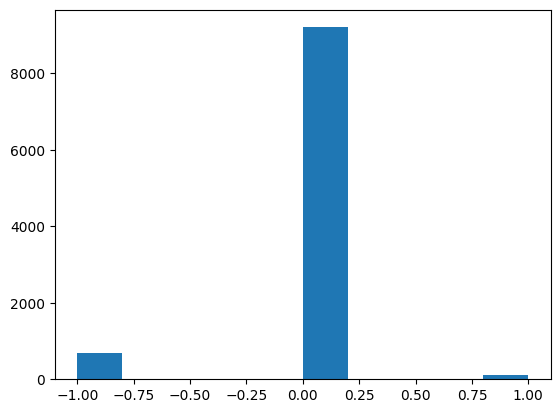

In [21]:
# 畫圖
plt.hist(ttl_error)

從長調圖可以看出:
1. 正確率超過九成
2. 如果有錯誤，幾乎都是<b>誤判成不同類</b>，而非同類

## (5) 動畫

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from module.for_model.checkpoint import get_best_model, load_checkpoint
from module.draw.draw import plot_decision_boundary

### Epoch-Wise

#### 調出 best model 的所有 checkpoint

In [3]:
name_experiment = "2024_0606_0319_part3"
n = 2
_, idx_best = get_best_model(name_experiment, n)
idx_best

5

In [4]:
path_folder = f"checkpoints\\{name_experiment}\\node_{n:02d}"
ttl_param = load_checkpoint(path_folder, "param")
len(ttl_param)

30

In [5]:
ttl_checkpoint_4_best_model = ttl_param[idx_best]
len(ttl_checkpoint_4_best_model)

1001

In [6]:
ttl_w = [param[0] for param in ttl_checkpoint_4_best_model]
ttl_b = [param[1] for param in ttl_checkpoint_4_best_model]
params = [(w,b[0]) for w,b in zip(ttl_w, ttl_b)]
len(params)

1001

In [7]:
num_epoch = 1001
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, plot_decision_boundary, fargs=(params, ax), frames=num_epoch, repeat=False, interval=0.1)

# 保存動畫
ani.save('GIFs/xor_2024_0606_0319_speedup_small_withData_tanh.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.
